In [11]:
%load_ext autoreload
%autoreload 2
%env WANDB_SILENT=true

from pathlib import Path
from copy import deepcopy
import matplotlib.pyplot as plt
import pandas as pd
import quantstats as qs
import os
import logging
import sys


# Filter logs to only print from `nbtools`
class NbFilter(logging.Filter):
    def filter(self, record):
        return "nbtools" in record.getName()

qs.extend_pandas()
plt.style.use("seaborn-whitegrid")
pd.set_option('display.max_rows', 200)

if "freqtrade" not in os.listdir():
    import nest_asyncio
    nest_asyncio.apply()
    os.chdir("..")
    logger = logging.getLogger("freqtrade.nbtools")
    handler = logging.StreamHandler(stream=sys.stdout)
    handler.setFormatter(logging.Formatter("%(name)s - %(message)s"))
    logger.addHandler(handler)
    # logger.addFilter(NbFilter())
    logger.setLevel(logging.INFO)

print("Working Directory:", os.getcwd())

# Freqtrade Imports
from freqtrade.optimize.optimize_reports import text_table_add_metrics
from freqtrade.nbtools.preset import LocalPreset
from freqtrade.nbtools.backtest import backtest
from freqtrade.nbtools import plotting

# Constants
PATH_MOUNT = Path.cwd().parent / "mount"
PAIRS_HIGH_CAP = [
    "BTC/USDT","ETH/USDT","ADA/USDT","BNB/USDT","XRP/USDT","DOT/USDT","DOGE/USDT","ZEC/USDT","NANO/USDT","NEO/USDT",
    "UNI/USDT","BCH/USDT","LINK/USDT","LTC/USDT","MATIC/USDT","XLM/USDT","SOL/USDT","ETC/USDT","VET/USDT","THETA/USDT",
    "EOS/USDT","TRX/USDT","FIL/USDT","XMR/USDT","AAVE/USDT","MKR/USDT","ATOM/USDT","ALGO/USDT","CAKE/USDT","KSM/USDT",
    "LUNA/USDT","BTT/USDT","AVAX/USDT","COMP/USDT","DASH/USDT","DCR/USDT","EGLD/USDT","WAVES/USDT","YFI/USDT","XEM/USDT",
    "CHZ/USDT","SUSHI/USDT","HOT/USDT","ZIL/USDT","SNX/USDT","MANA/USDT","ENJ/USDT","HNT/USDT","BAT/USDT","NEAR/USDT",
    "QTUM/USDT","GRT/USDT","ONE/USDT","ONT/USDT","BAKE/USDT","BNT/USDT","ZRX/USDT","FTM/USDT","OMG/USDT","CELO/USDT",
    "ICX/USDT","ANKR/USDT","RVN/USDT","CRV/USDT", "FTT/USDT", "TFUEL/USDT"
]
PAIRS_BLVT_DOWN = [
    "BTCDOWN/USDT", "BNBDOWN/USDT", "AAVEDOWN/USDT", "XRPDOWN/USDT", "ADADOWN/USDT", "SUSHIDOWN/USDT",
    "DOTDOWN/USDT", "1INCHDOWN/USDT", "LINKDOWN/USDT", "UNIDOWN/USDT", "SXPDOWN/USDT", "EOSDOWN/USDT", "BCHDOWN/USDT",
    "XLMDOWN/USDT", "FILDOWN/USDT", "TRXDOWN/USDT", "XTZDOWN/USDT", "LTCDOWN/USDT",
]
# ETHDOWN/USDT, YFIDOWN/USDT


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
env: WANDB_SILENT=true
Working Directory: C:\CS\Python\crypto-collection\freqtrade\superft


In [16]:
LOCAL_PRESET_NAME = "15m-next30m-combine"
TIMERANGE = "20210501-20210801"

PATH_LOCAL_PRESET = PATH_MOUNT / "presets" / LOCAL_PRESET_NAME
PATH_LOCAL_DATADIR = PATH_MOUNT / "data"

preset = LocalPreset(
    path_local_preset=PATH_LOCAL_PRESET,
    path_data=PATH_LOCAL_DATADIR,
    timerange=TIMERANGE
)
# NOTE: Optional!
preset.overwrite_config(pairs=PAIRS_BLVT_DOWN)

stats, summary = backtest(preset, preset.default_strategy_code)
trades = pd.DataFrame(stats["strategy"]["NotebookStrategy"]["trades"])

freqtrade.nbtools.preset.base_preset - Setting config for 15m-next30m-combine ...
freqtrade.nbtools.preset.base_preset - Overwriting pairs (from 64 to 18 pairs)
freqtrade.nbtools.preset.base_preset - Setting arg `datadir` to C:\CS\Python\crypto-collection\freqtrade\mount\data\binance
freqtrade.nbtools.preset.base_preset - Setting arg `timerange` to 20210501-20210801
freqtrade.nbtools.backtest - Backtesting...
freqtrade.nbtools.backtest - Strategy using minimal_roi: {'30': -1000}
freqtrade.nbtools.backtest - Strategy using timeframe: 15m
freqtrade.nbtools.backtest - Strategy using stoploss: -0.99
freqtrade.nbtools.backtest - Strategy using trailing_stop: False
freqtrade.nbtools.backtest - Strategy using trailing_stop_positive_offset: 0.0
freqtrade.nbtools.backtest - Strategy using trailing_only_offset_is_reached: False
freqtrade.nbtools.backtest - Strategy using use_custom_stoploss: False
freqtrade.nbtools.backtest - Strategy using process_only_new_candles: False
freqtrade.nbtools.backt

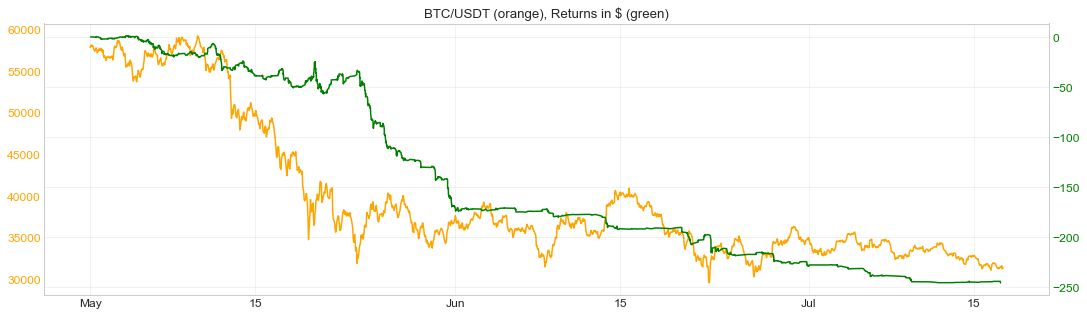

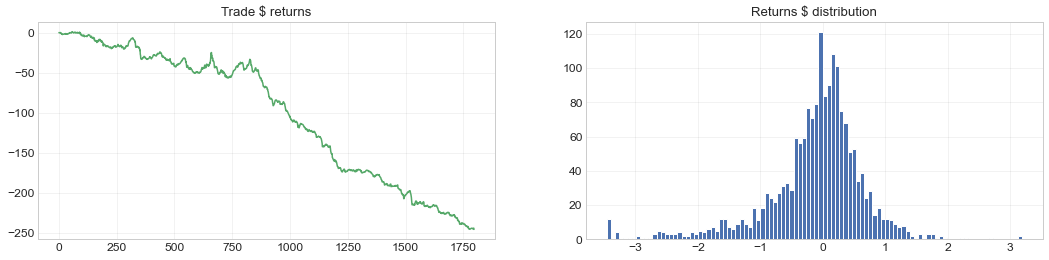

,Portfolio Summary
Min Balance,-245.47
Max Balance,1.54
End Balance,-245.47
Trades,1797.00
Avg. Profit %,-0.91
Avg. Profit $,-0.14
Biggest Profit $,5.19
Biggest Loss $,-5.21


In [17]:
plotting.plot_profits(
    trades,
    start = "2021-05-01",
    end = "2021-08-01",
    path_mount = PATH_MOUNT
)

In [18]:
def process_result_dataframe(result_df):
    result_df = result_df.drop(columns=["profit_mean", "profit_total", "profit_sum"])
    result_df = result_df.sort_values(by=["profit_total_abs"], ascending=False)
    result_df.round(2)
    return result_df

# Running this cell will print backtest results
results = deepcopy(stats["strategy"]["NotebookStrategy"])

# Results per pair
results_per_pair = pd.DataFrame(results["results_per_pair"]).set_index("key")
results_per_pair = process_result_dataframe(results_per_pair)

# Sell reason stats
sells = pd.DataFrame(results['sell_reason_summary']).set_index("sell_reason")
sells = process_result_dataframe(sells)

# Left open trades
left_open_trades = pd.DataFrame(results['left_open_trades']).set_index("key")
left_open_trades = process_result_dataframe(left_open_trades)

# Summary metrics
metrics = text_table_add_metrics(results)
advanced_metrics = deepcopy(stats["metadata"])
advanced_metrics["profit_mean"] = advanced_metrics["profit_mean"] * 100
advanced_metrics["profit_median"] = advanced_metrics["profit_median"] * 100
advanced_metrics["profit_total"] = advanced_metrics["profit_total"] * 100

for key in list(advanced_metrics):
    value = advanced_metrics[key]
    valid = any(isinstance(value, it) for it in [str, int, float, bool])
    
    if not valid:
        del advanced_metrics[key]
        continue
    
    if isinstance(value, float):
        advanced_metrics[key] =  round(value, 3)
    
    advanced_metrics[key] = [advanced_metrics[key]]
    
advanced_metrics_df = pd.DataFrame(advanced_metrics)
    
print("Results Per Pair")
display(results_per_pair)
print("Sell Reasons")
display(sells)
print("Left Open Trades")
display(left_open_trades)
print("Freqtrade Summary Metrics")
print("=" * 48 + "\n" + metrics + "\n" + "=" * 48)
print("Advanced Metrics")
print("Preset Name:", advanced_metrics_df["preset_name"][0])
display(advanced_metrics_df.drop(columns=["preset_name"]).T)

Results Per Pair


,trades,profit_mean_pct,profit_sum_pct,profit_total_abs,profit_total_pct,duration_avg,wins,draws,losses
key,,,,,,,,,
BTCDOWN/USDT,40,0.582360,23.29,3.497657,0.35,0:36:00,25,0,15
XRPDOWN/USDT,139,0.064324,8.94,1.342489,0.13,0:43:00,77,0,62
FILDOWN/USDT,36,0.153921,5.54,0.832004,0.08,0:37:00,22,0,14
XTZDOWN/USDT,72,-0.357789,-25.76,-3.867984,-0.39,0:45:00,39,0,33
EOSDOWN/USDT,101,-0.318051,-32.12,-4.823287,-0.48,0:39:00,49,0,52
SXPDOWN/USDT,106,-0.415033,-43.99,-6.605629,-0.66,0:46:00,56,0,50
TRXDOWN/USDT,52,-1.085045,-56.42,-8.471811,-0.85,0:45:00,26,0,26
LTCDOWN/USDT,77,-0.737041,-56.75,-8.521342,-0.85,0:41:00,37,0,40
BNBDOWN/USDT,111,-0.702309,-77.96,-11.705147,-1.17,0:44:00,52,0,59


Sell Reasons


,trades,wins,draws,losses,profit_mean_pct,profit_sum_pct,profit_total_abs,profit_total_pct
sell_reason,,,,,,,,
roi,1797,871,0,926,-0.91,-1634.83,-245.469319,-272.47


Left Open Trades


,trades,profit_mean_pct,profit_sum_pct,profit_total_abs,profit_total_pct,duration_avg,wins,draws,losses
key,,,,,,,,,
TOTAL,0,0.0,0.0,0.0,0.0,0:00,0,0,0


Freqtrade Summary Metrics
| Metric                 | Value                   |
|------------------------+-------------------------|
| Backtesting from       | 2021-05-01 00:00:00     |
| Backtesting to         | 2021-07-17 11:45:00     |
| Max open trades        | 6                       |
|                        |                         |
| Total/Daily Avg Trades | 1797 / 23.34            |
| Starting balance       | 1000.000 USDT           |
| Final balance          | 754.531 USDT            |
| Absolute profit        | -245.469 USDT           |
| Total profit %         | -24.55%                 |
| Avg. stake amount      | 15.000 USDT             |
| Total trade volume     | 26955.000 USDT          |
|                        |                         |
| Best Pair              | BTCDOWN/USDT 23.29%     |
| Worst Pair             | SUSHIDOWN/USDT -317.61% |
| Best trade             | XRPDOWN/USDT 34.56%     |
| Worst trade            | SUSHIDOWN/USDT -34.73%  |
| Best day          

,0
random_name,sick-vivy-cpu
preset_type,LocalPreset
backtest_date,2021-07-24 00:20:53
leverage,1
direction,long
is_hedging,False
fee,0.001
num_pairs,17
data_source,binance
win_rate,0.485
